# Example Logistic Regression
Run `pip install -e .` if packages cannot be found.

In [1]:
from models.logistic_reg import LogisticReg
from utils.common_utils import auto_assign
from data_processors.base_data_processor import BaseDataProcessor
import matplotlib.pyplot as plt

/Users/xtchen/Projects/deep-learning-with-mnist/mnist/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Data Processing

In [2]:
# process data
data_processor = BaseDataProcessor()
data_processor.setup()
train_X, train_y, val_X, val_y, test_X, test_y = data_processor.load_data()

: Loading MNIST datasets...
train_X: (42000, 28, 28)
train_y: (42000,)
val_X: (18000, 28, 28)
val_y: (18000,)
test_X:  (10000, 28, 28)
test_y:  (10000,)


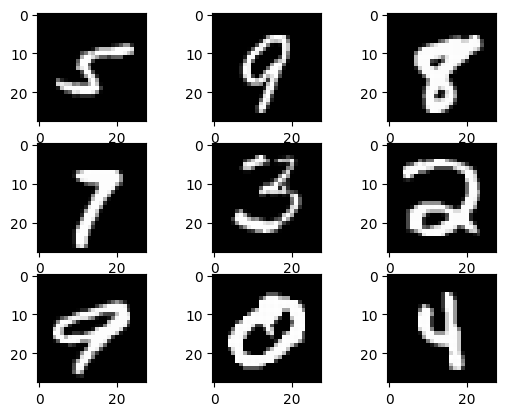

In [3]:
# visualize images
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# examine X
print(min(set(test_X.flatten())), max(set(test_X.flatten())))

0 255


In [5]:
# examine y
set(test_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Model Training

In [6]:
# hyper_params (these will be set in gin files in the pipeline)
penalty="l2"
C=1.0
random_state=0
max_iter=100

In [7]:
# initialize model
model = LogisticReg(penalty, C, random_state, max_iter)

# train model
model.train(train_X, train_y, val_X, val_y)

Training logistic reg.
Validation accuracy: 0.9195
Validation F1: 0.9180189490221572


/Users/xtchen/Projects/deep-learning-with-mnist/mnist/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Eval

In [10]:
# evaluate model
acc, f1 = model.evaluate(test_X, test_y)
print("Test acc: {}".format(acc))
print("Test f1: {}".format(f1))

Test acc: 0.9201
Test f1: 0.9188441575346495
